# Анализ контента Netflix

В 2018г. Flixable опубликовал отчет(https://flixable.com/netflix-museum/), согласно которому количество ТВ шоу на Netflix увеличилось почти втрое с 2010г. Увеличение интереса к сериалам - ожидаемая тенденция, на которую неоднократно обращали внимание исследователи кино, культурологи и антропологи. Сериалы – идеальный контент для стриминговых сервисов, онлайн-кинотеатров. Если сериал понравился, то он заставляет обращаться к сервису снова и снова, что не происходит в случае с кино. 

Для сериалов не работают те механизмы, которые работают для кино. Фильмы могут быть с низким рейтингом, но получить большие сборы и просмотры (яркий пример «50 оттенков серого»). Сериалы не могут себе этого позволить. Если сериал некачественный и неинтересный, его не будут из любопытства смотреть уже со второй серии.  Поэтому, при выборе контента онлайн-кинотеатры должны много внимания обращать внимание на качество (рейтинг) сериала.  Скорее всего, со временем не только возрастает количество сериалов и интерес к ним, но и качество сериалов, и качество отбираемого материала. Попробуем доказать это на данных  Netflix.


# Содержание
1. [Просмотр и предобработка данных](#1-bullet)
2. [Исследовательский анализ данных](#2-bullet)
    * Основной контент по странам в разбивке на шоу и кино
    * Распределение длительности фильмов по странам топ 3
    * Количество фильмов и шоу по странам по годам
    * Длительность фильмов и количество сезонов у шоу по годам
3. [Присоединение данных рейтинга IMDB](#3-bullet)
4. [Рейтинг по странам по фильмам и ТВ шоу](#4-bullet)
5. [Распределение данных по странам (год релиза, число голосов, год издания на Netflix, рейтинг)](#5-bullet)
6. [Топ 10 жанров Netflix по фильмам](#6-bullet)
7. [Проверка статистической значимости разницы между рейтингами по жанрам](#7-bullet)
8. [Кластеризация фильмов на основании года загрузки на Netflix, года релиза, длительности, рейтинга, количества голосов](#8-bullet)
9. [Сравнение фильмов и тв шоу с высоким рейтингом](#9-bullet)
10. [Вывод](#1-bullet)

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as math
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

In [602]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

## Просмотр и предобработка данных<a id='1-bullet'></a> 

In [63]:
df=pd.read_csv('C:/Users/Гаяне/Desktop/хакатон/netflix_titles.csv')

In [600]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [65]:
df.query('duration != "%Season"')
season = df['duration'].str.split(' ',expand = True)
season.columns=['mins','seasons']
df_new= df.join(season)
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mins,seasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min


In [82]:
df_new['mins'] = df_new['mins'].astype(int)
df_new['date_added']= pd.to_datetime(df_new['date_added'])
df_new['year'] = df_new['date_added'].dt.year


## Исследовательский анализ данных <a id='2-bullet'></a> 
### Основной контент по странам в разбивке на шоу и кино

In [106]:
movie = df_new.query('type=="Movie"')
show = df_new.query('type=="TV Show"')


In [108]:
top20country_m =movie.groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
country10_m=top20country_m['country'].tolist()
top20country_sh =show.groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
country10_sh=top20country_sh['country'].tolist()


In [102]:
top20country_s =show.groupby('country').agg({'title':'count'}).rename(columns={'title':'show'}).sort_values(by='title', ascending=False).head(10).reset_index()


In [123]:
top20country_sh1 =show.groupby('country').agg({'title':'count'}).rename(columns={'title':'show'}).reset_index().sort_values(by='show', ascending=False).head(20)
top20country_m1 =movie.groupby('country').agg({'title':'count'}).rename(columns={'title':'movie'}).reset_index().sort_values(by='movie', ascending=False).head(20)

In [146]:
top20merge = top20country_sh1.merge(top20country_m1, on='country').sort_values(by='country')
top20merge['part']=top20merge['show']/(top20merge['show']+top20merge['movie'])
top20merge = top20merge.sort_values(by='part', ascending=False)
top20merge1 = top20merge['country'].tolist()
top20merge

,country,show,movie,part
3,South Korea,147,36,0.803279
2,Japan,157,69,0.694690
6,Australia,46,37,0.554217
1,United Kingdom,204,193,0.513854
7,France,46,69,0.400000
12,"United States, Canada",22,38,0.366667
11,Brazil,26,46,0.361111
9,Mexico,35,65,0.350000
8,Spain,45,89,0.335821
5,Canada,59,118,0.333333


In [284]:

fig = go.Figure(data=[
    go.Bar(name='Not show', x=top20merge1, y=top20merge['part'])
])
fig.update_layout(title="Доля фильмов по странам")
fig.update_xaxes(title='country')
fig.update_yaxes(title='Movie')
fig.update_layout(barmode='group')
fig.show()

In [285]:
import plotly.graph_objects as go
title= top20country_m['title']
fig = go.Figure(data=[
    go.Bar(name='Not show', x=country10_m, y=title)
])
fig.update_layout(title="Количество фильмов по странам")
fig.update_xaxes(title='country')
fig.update_yaxes(title='Movie')
fig.update_layout(barmode='group')
fig.show()

In [286]:
import plotly.graph_objects as go
title= top20country_sh['title']
fig = go.Figure(data=[
    go.Bar(name='Not show', x=country10_sh, y=title)
])
fig.update_layout(title="Количество шоу по странам")
fig.update_xaxes(title='Country')
fig.update_yaxes(title='TV Show')
fig.update_layout(barmode='group')
fig.show()

### Вывод
По количеству шоу лидерует США(700 шоу), с большим отрывом идут Англия, Япония и Корея.
По количеству фильмов лидирует США(около 2000 фильмов), с большим отрывом следует Индия, Англия и Канада. 
В процентном соотношении больше всего сериалов производтсва Южной Кории (80% от всей продукции Кореи), на втором месте Япония, на третьем Австралия.

### Распределение длительности фильмов по странам топ 3


count    1850.000000
mean       89.393514
std        25.335771
min         3.000000
25%        78.000000
50%        91.000000
75%       103.000000
max       312.000000
Name: mins, dtype: float64

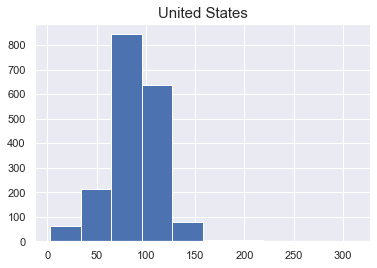

In [280]:
df_new.query('type=="Movie" and country == "United States"')['mins'].hist()
plt.title('United States', fontsize=15);
df_new.query('type=="Movie" and country == "United States"')['mins'].describe()


count    193.000000
mean      84.378238
std       24.401736
min       15.000000
25%       64.000000
50%       90.000000
75%       99.000000
max      146.000000
Name: mins, dtype: float64

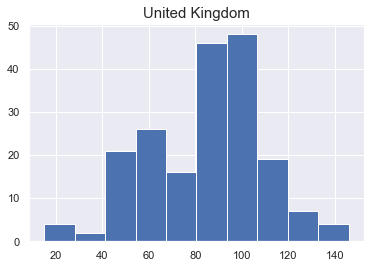

In [282]:
df_new.query('type=="Movie" and country == "United Kingdom"')['mins'].hist()
plt.title('United Kingdom', fontsize=15);
df_new.query('type=="Movie" and country == "United Kingdom"')['mins'].describe()


count    852.000000
mean     127.414319
std       25.451152
min       29.000000
25%      112.000000
50%      127.000000
75%      143.000000
max      228.000000
Name: mins, dtype: float64

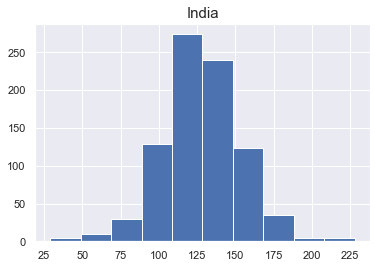

In [283]:
df_new.query('type=="Movie" and country == "India"')['mins'].hist()
plt.title('India', fontsize=15);

df_new.query('type=="Movie" and country == "India"')['mins'].describe()



### Вывод
Индийские фильмы отличаются длительностью. В среднем 127 минут, в то время, как американские и английские длятся 90 минут.

### Количество фильмов и шоу по странам по годам


In [727]:
movie
top20merge1=top20merge['country']
movie1=movie.query('country in ("United States", "United Kingdom","India", "Canada", "Spain")')
show2= show.query('country in  ("United States", "United Kingdom","Japan", "South Korea", "India")')
show2['for_count'] = 1
movie1['for_count'] = 1

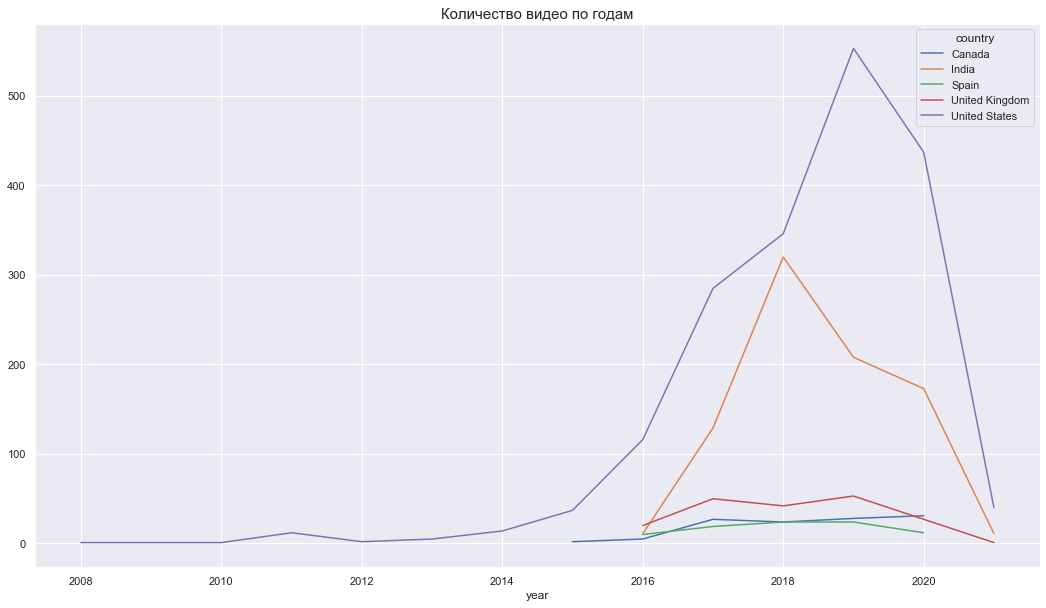

In [279]:
pd.pivot_table(movie1, index='year', columns='country', values='for_count', aggfunc='sum').plot(figsize=(18,10))
plt.title('Количество видео по годам', fontsize=15);

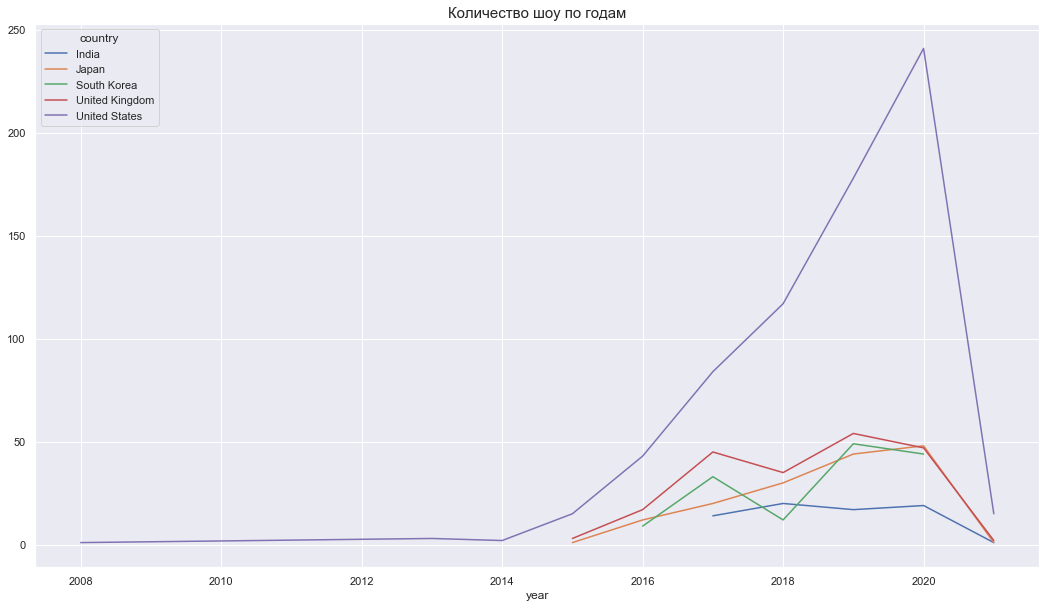

In [278]:
pd.pivot_table(show2, index='year', columns='country', values='for_count', aggfunc='sum').plot(figsize=(18,10))
plt.title('Количество шоу по годам', fontsize=15);


Пик популярности американских фильмов был в 2019г., индийские фильмы в большом количестве загрузили в 2018г.
Американские шоу набрали популярность в 2020г. Английские фильмы и шоу больше всего загружали в 2017 и 2019. Это сопадает с загрузкой корейских сериалов. Японские шоу догнали по количеству корейские и английские в 2020 г. Похоже, что 2020г. можно назвать годом наибольшей популярности шоу. Возможно, это связано с пандемией, когда большое количество людей остались дома, так что увлечилась потребность в тв шоу.

### Длительность фильмов и количество сезонов в шоу по годам

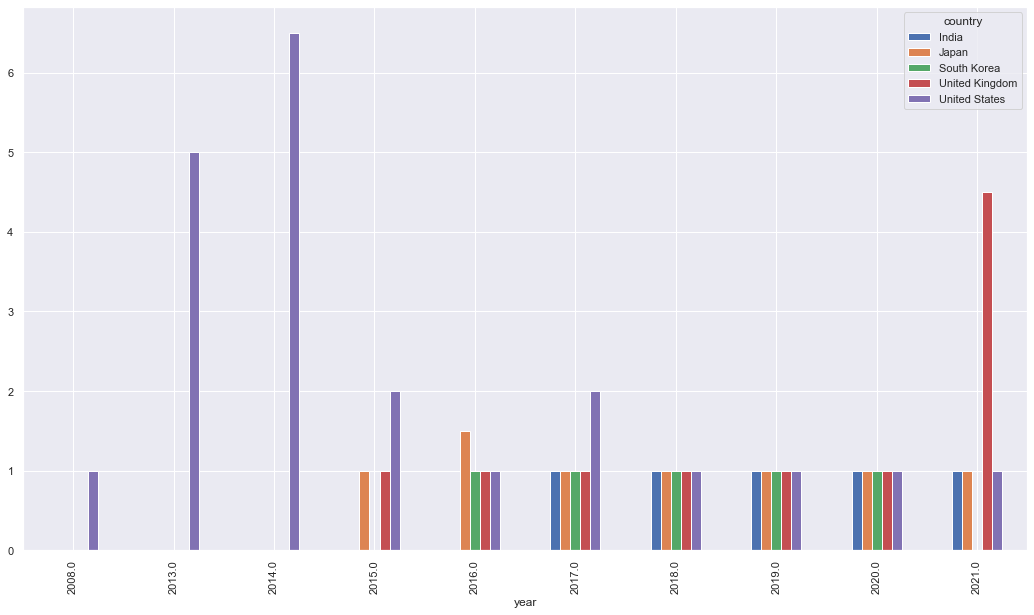

In [274]:
pd.pivot_table(show2, index='year', columns='country', values='mins', aggfunc='median').plot(kind='bar',figsize=(18,10))


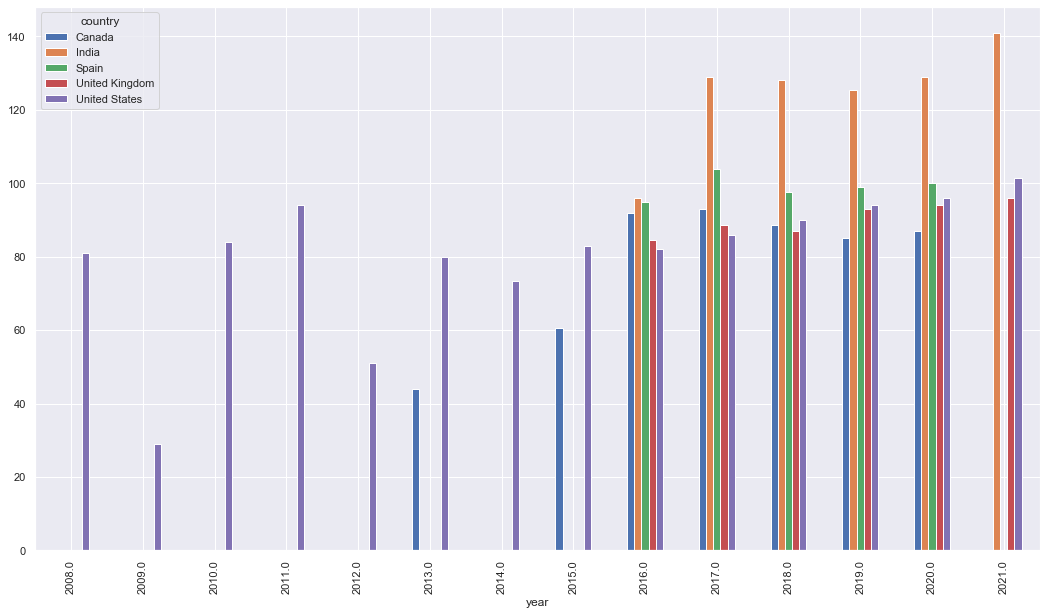

In [275]:
pd.pivot_table(movie1, index='year', columns='country', values='mins', aggfunc='median').plot(kind='bar', figsize=(18,10))


### Вывод
В среднем все страны из топ 5 снимают по 1 сезону. Длительность фильмов у США стремится к увеличению. Самые длинные фильмы у Индии, на втором месте Испания.

## Присоединение данных рейтинга IMDB<a id='3-bullet'></a>  
Поскольку данные представленны в разных таблицах, необходимо поэтапно соединять таблицы. 

In [598]:
IMDB = pd.read_csv('C:/Users/Гаяне/Desktop/title.ratings.tsv/data.csv',sep="\t")
IMDB.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1684
1,tt0000002,6.0,207
2,tt0000003,6.5,1421
3,tt0000004,6.1,121
4,tt0000005,6.1,2221


In [599]:
title_IMDB = pd.read_csv('C:/Users/Гаяне/Desktop/title.basics.tsv/data.csv',sep="\t")
title_IMDB.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [306]:
IMDB_megre = IMDB.merge(title_IMDB, on='tconst', how='left')
IMDB_megre.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1684,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,207,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1421,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,121,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.1,2221,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1124154,tt9916580,7.2,5,tvEpisode,Horrid Henry Horrid Boy?,Horrid Henry Horrid Boy?,0,2012,\N,10,"Animation,Comedy,Family"
1124155,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Animation,Comedy,Family"
1124156,tt9916720,6.2,72,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
1124157,tt9916766,6.9,16,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV"


In [307]:
IMDB1 = IMDB_megre[['tconst','numVotes','averageRating','primaryTitle', 'startYear','runtimeMinutes']]


In [290]:
author =pd.read_csv('C:/Users/Гаяне/Desktop/data.csv',sep="\t")
author.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0031983,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0069467"
...,...,...,...,...,...,...
10734582,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10734583,nm9993716,Essias Loberg,\N,\N,NaN,\N
10734584,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10734585,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [291]:
author_id=pd.read_csv('C:/Users/Гаяне/Desktop/title.crew.tsv/data.csv',sep="\t")
author_id.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
7641154,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7641155,tt9916850,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
7641156,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7641157,tt9916856,nm10538645,nm6951431


In [298]:
author_merge= author_id.merge(author, left_on='directors', right_on='nconst', how='left')
author_merge.head()

,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,nm0005690,\N,nm0005690,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1428455,tt1496763"
1,tt0000002,nm0721526,\N,nm0721526,Émile Reynaud,1844,1918,"director,writer,animation_department","tt0000003,tt2184201,tt2184231,tt0413219"
2,tt0000003,nm0721526,\N,nm0721526,Émile Reynaud,1844,1918,"director,writer,animation_department","tt0000003,tt2184201,tt2184231,tt0413219"
3,tt0000004,nm0721526,\N,nm0721526,Émile Reynaud,1844,1918,"director,writer,animation_department","tt0000003,tt2184201,tt2184231,tt0413219"
4,tt0000005,nm0005690,\N,nm0005690,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0308254,tt0219560,tt1428455,tt1496763"
...,...,...,...,...,...,...,...,...,...
7641154,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377",NaN,NaN,NaN,NaN,NaN,NaN
7641155,tt9916850,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377",NaN,NaN,NaN,NaN,NaN,NaN
7641156,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377",NaN,NaN,NaN,NaN,NaN,NaN
7641157,tt9916856,nm10538645,nm6951431,nm10538645,Johan Planefeldt,\N,\N,director,\N


In [299]:
author_merge = author_merge[['tconst', 'directors', 'primaryName', 'birthYear']]

In [308]:
author_merge1= IMDB1.merge(author_merge, on='tconst', how='left')
author_merge1

,tconst,numVotes,averageRating,primaryTitle,startYear,runtimeMinutes,directors,primaryName,birthYear
0,tt0000001,1684,5.7,Carmencita,1894,1,nm0005690,William K.L. Dickson,1860
1,tt0000002,207,6.0,Le clown et ses chiens,1892,5,nm0721526,Émile Reynaud,1844
2,tt0000003,1421,6.5,Pauvre Pierrot,1892,4,nm0721526,Émile Reynaud,1844
3,tt0000004,121,6.1,Un bon bock,1892,12,nm0721526,Émile Reynaud,1844
4,tt0000005,2221,6.1,Blacksmith Scene,1893,1,nm0005690,William K.L. Dickson,1860
...,...,...,...,...,...,...,...,...,...
1124154,tt9916580,5,7.2,Horrid Henry Horrid Boy?,2012,10,nm0996406,Hilary Audus,\N
1124155,tt9916690,5,6.6,Horrid Henry Delivers the Milk,2012,10,nm0996406,Hilary Audus,\N
1124156,tt9916720,72,6.2,The Nun 2,2019,10,nm10538600,Niclas Schmidt,\N
1124157,tt9916766,16,6.9,Episode #10.15,2019,43,\N,NaN,NaN


In [625]:
new1= df_new.merge(author_merge1, left_on=['title', 'director' ], right_on=['primaryTitle','primaryName'], how='left').drop_duplicates(subset=['show_id'])
new1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year,tconst,numVotes,averageRating,primaryTitle,startYear,runtimeMinutes,directors,primaryName,birthYear
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,2020.0,tt2096351,2056.0,7.8,3%,2011,27,"nm2944272,nm3120984,nm4746526",NaN,NaN
2,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,2016.0,tt5979312,569.0,6.0,7:19,2016,94,nm1664036,Jorge Michel Grau,1973
3,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,2018.0,tt2100376,848.0,4.6,23:59,2011,78,nm2197845,Gilbert Chan,\N
4,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,2017.0,tt0443424,6427.0,7.8,9,2005,11,nm0009942,Shane Acker,\N
6,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,2020.0,tt0478087,230193.0,6.8,21,2008,123,nm0525659,Robert Luketic,1973


### Рейтинг по странам по фильмам и ТВ шоу<a id='4-bullet'></a> 

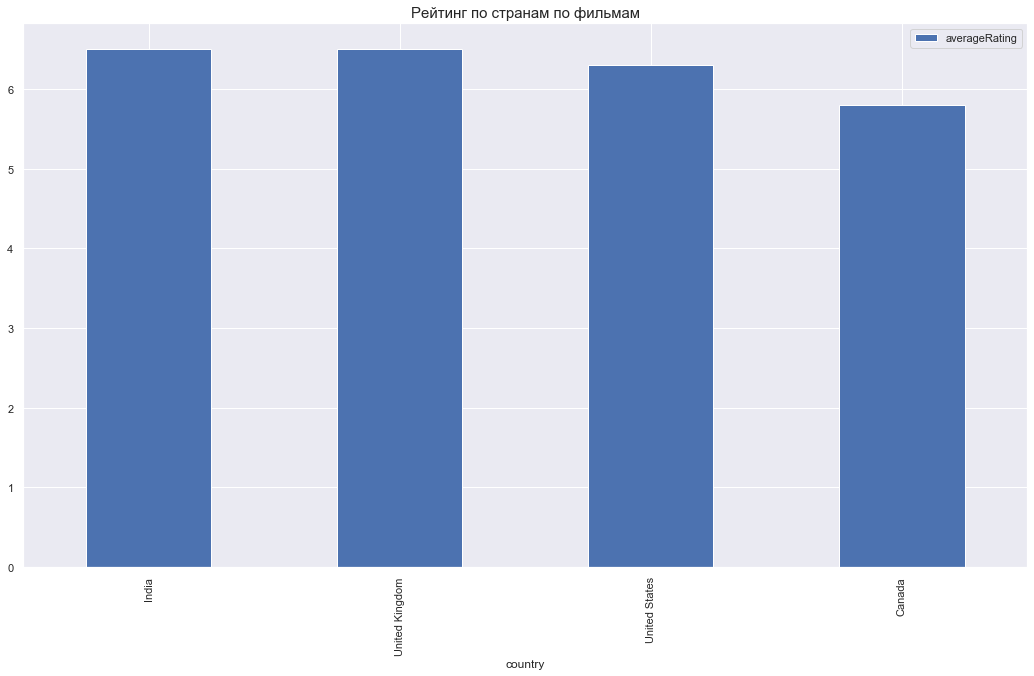

In [387]:
country__top_rating_m = new1.query('type=="Movie"').groupby('country').agg({'averageRating':'median', 'for_count':'sum','numVotes':'median'}).sort_values(by=['for_count','averageRating'], ascending=False).head(10).reset_index()
new1['for_count']=1
country__top_rating_m.query('for_count >=100').sort_values(by='averageRating', ascending=False).plot(x='country', y='averageRating', kind='bar',figsize=(18,10))
plt.title('Рейтинг по странам по фильмам', fontsize=15)
country__top_rating_m;

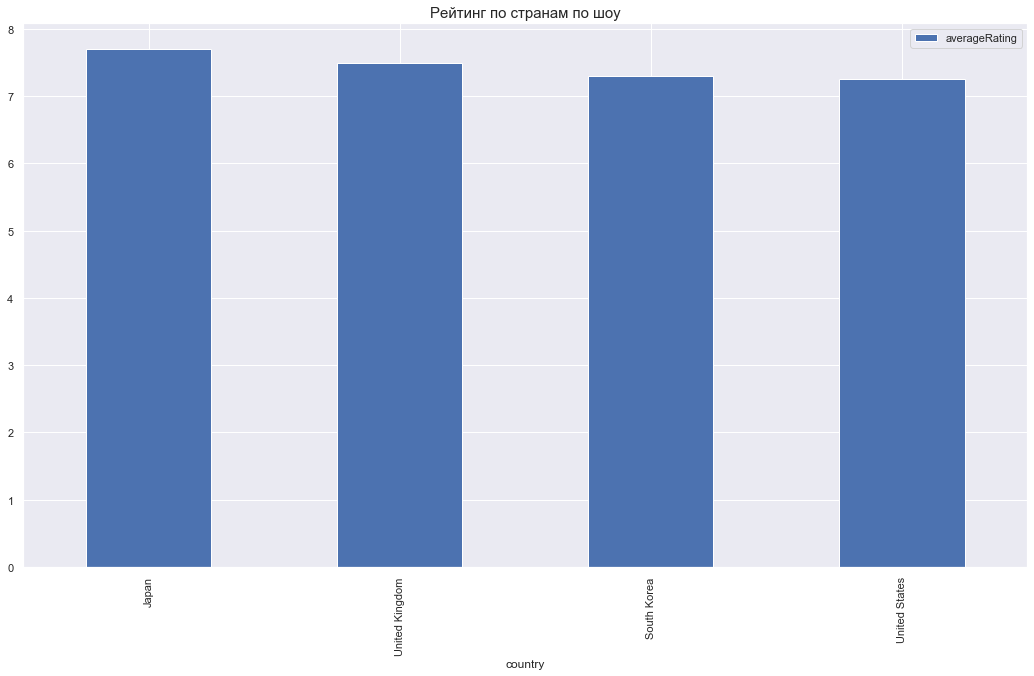

In [382]:
country__top_rating_sh = new1.query('type=="TV Show"').groupby('country').agg({'averageRating':'median', 'for_count':'sum'}).sort_values(by=['for_count','averageRating'], ascending=False).head(10).reset_index()
country__top_rating_sh.query('for_count >=100').sort_values(by='averageRating', ascending=False).plot(x='country', y='averageRating', kind='bar',figsize=(18,10))
plt.title('Рейтинг по странам по шоу', fontsize=15);

Тройка самых рейтинговых стран по фильмам(в расчет брали только те страны, где фильмов больше 100) это Индия, UK, USA и Канада. 
По шоу - Япония, UK, Корея и США.

## Распределение по странам (год релиза, число голосов, год издания на Netflix, рейтинг)<a id='5-bullet'></a> 


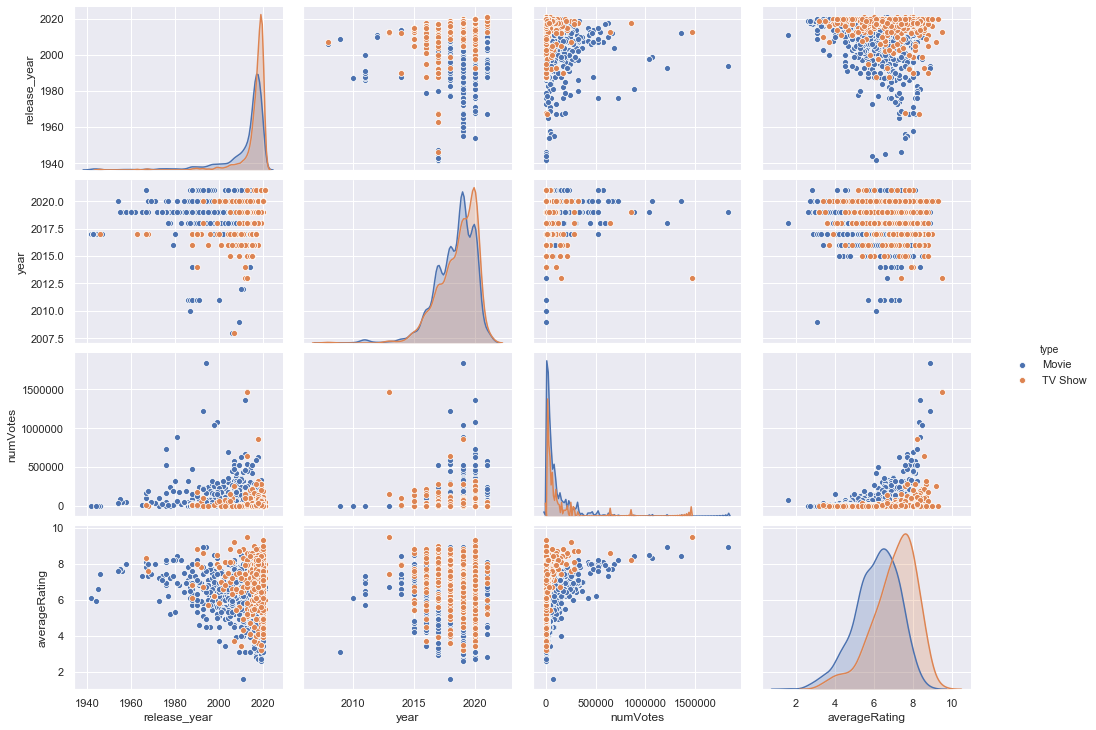

In [376]:
new12_US= new1.query('country =="United States"')[['release_year', 'year', 'numVotes','averageRating','type']]
sns.pairplot(new12_US,  hue='type') 

plt.title('United States', fontsize=15)
fig = plt.gcf()

fig.set_size_inches(15, 10)

В США видна тенденция в сторону шоу, и хотя у фильмов бывает больше голосов, рейтинг сериалов в среднем выше

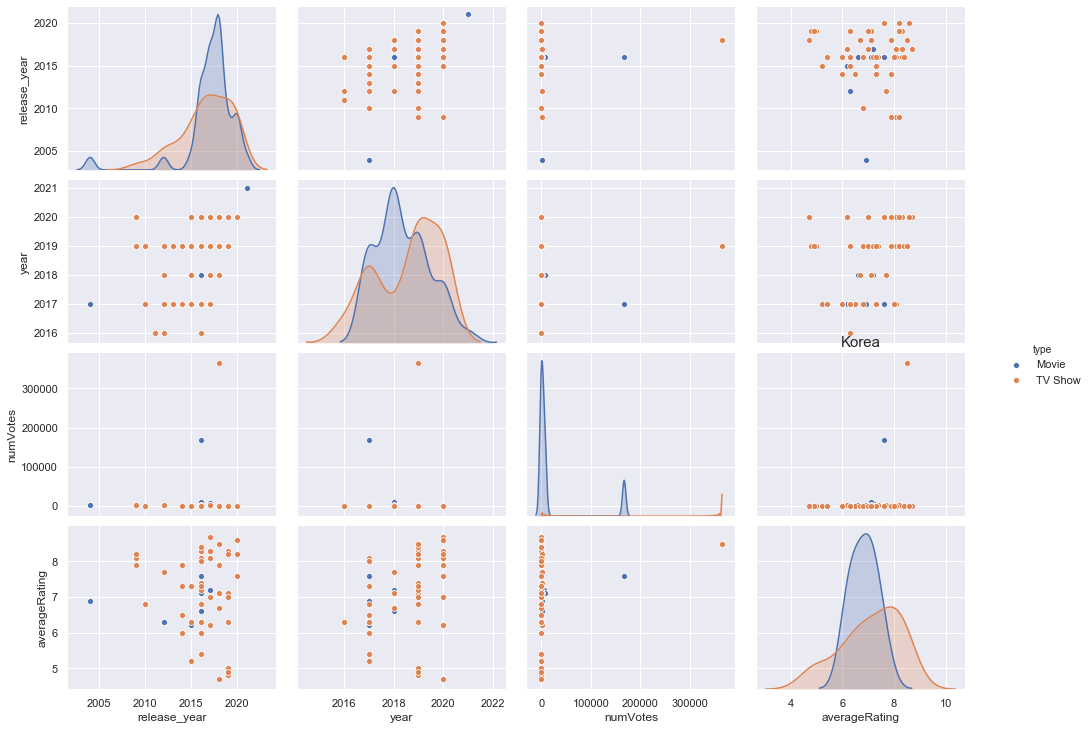

In [386]:
new12_Kor= new1.query('country =="South Korea"')[['release_year', 'year', 'numVotes','averageRating','type']]
sns.pairplot(new12_Kor,  hue='type') 

plt.title('Korea', fontsize=15)
fig = plt.gcf()

fig.set_size_inches(15, 10)

В Корее мало данных по фильмам. Не так много голосов, но в среднем высокий рейтинг.

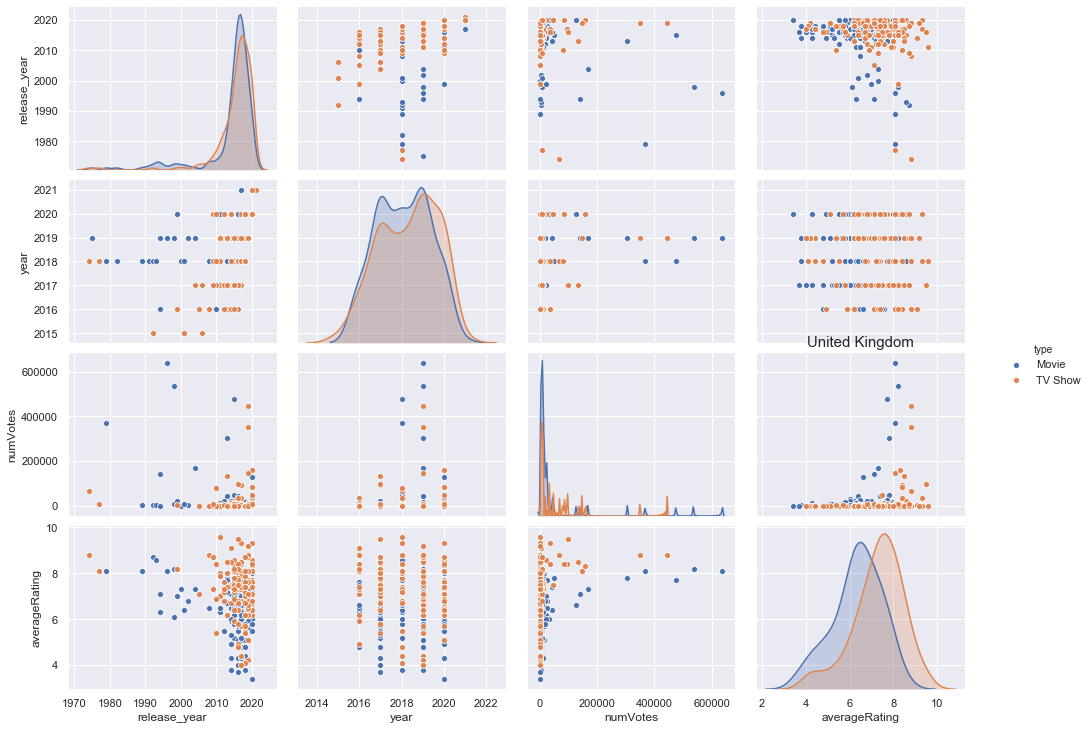

In [379]:
new12_UK= new1.query('country =="United Kingdom"')[['release_year', 'year', 'numVotes','averageRating','type']]
sns.pairplot(new12_UK,  hue='type') 

plt.title('United Kingdom', fontsize=15)
fig = plt.gcf()

fig.set_size_inches(15, 10)

В Англии также тв шоу получают более высокий рейтинг, чем фильмы. 

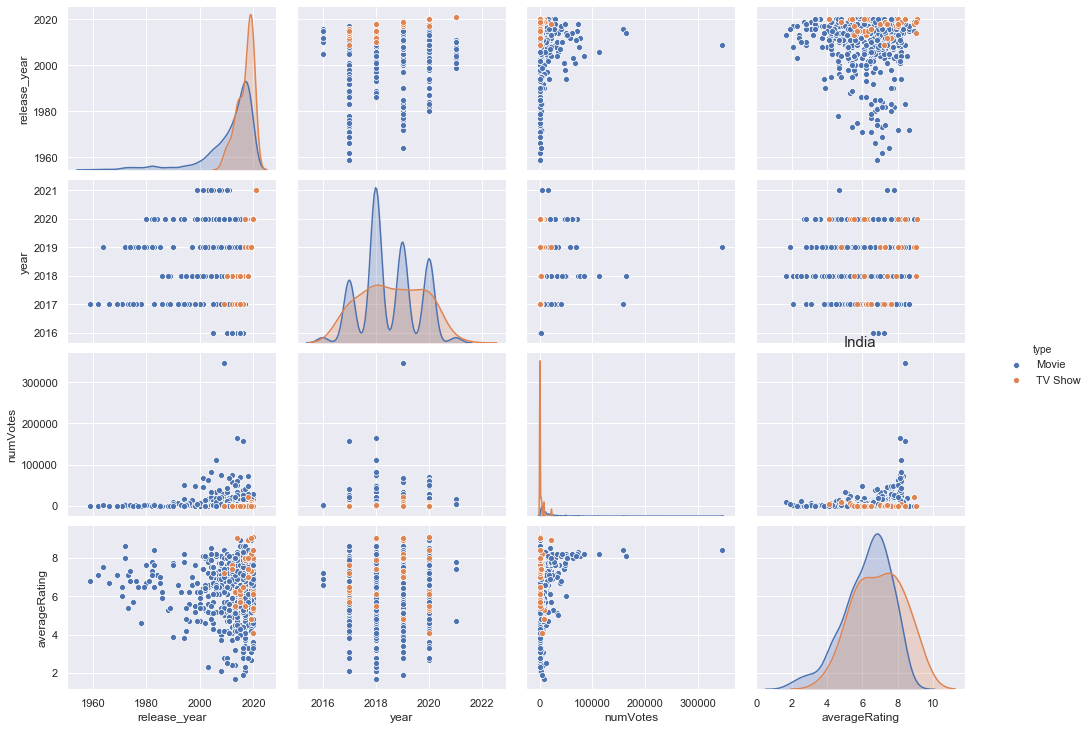

In [380]:
new12_I= new1.query('country =="India"')[['release_year', 'year', 'numVotes','averageRating','type']]
sns.pairplot(new12_I,  hue='type') 

plt.title('India', fontsize=15)
fig = plt.gcf()

fig.set_size_inches(15, 10)

В Индии практически нет шоу, высоким рейтингом пользуются фильмы.

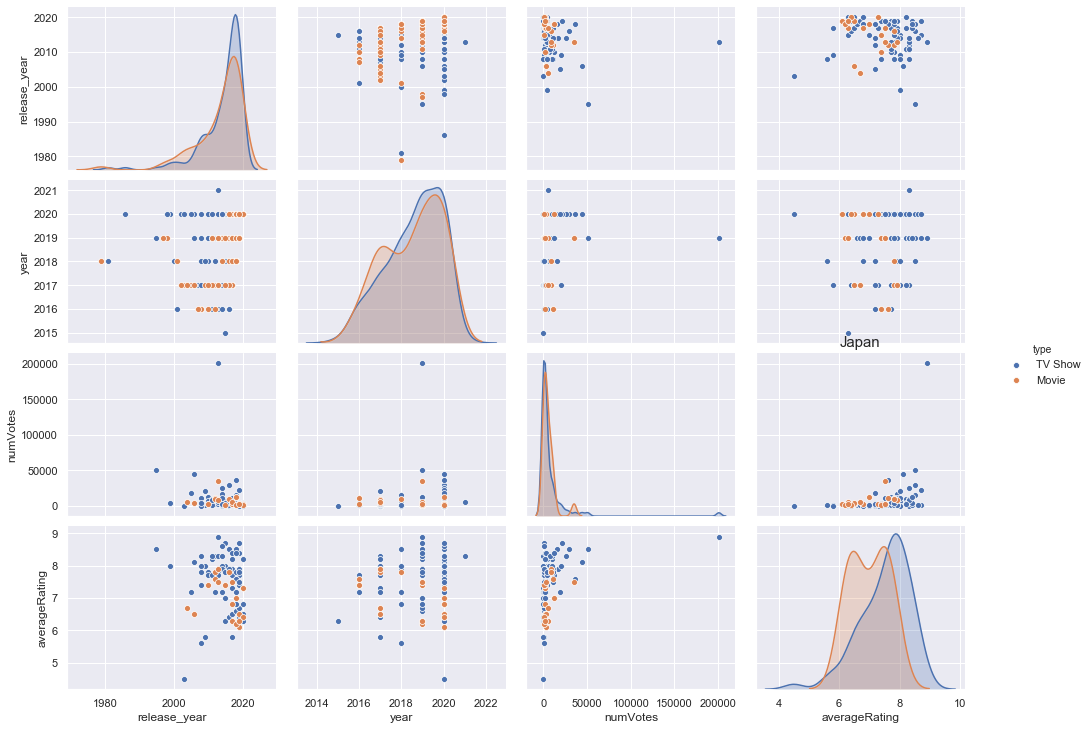

In [384]:
new12_J= new1.query('country =="Japan"')[['release_year', 'year', 'numVotes','averageRating','type']]
sns.pairplot(new12_J,  hue='type') 

plt.title('Japan', fontsize=15)
fig = plt.gcf()

fig.set_size_inches(15, 10)

Японские шоу обладают более высоким рейтингом, чем фильмы. Так же идет тенденция в сторону увеличения шоу. 

In [180]:
print(df_new.query('year >=2015')['title'].count())
print(df_new.query('year <2015')['title'].count())
print(df_new.query('year ==2017')['title'].count())

7720
57
1225


### Распределение загрузки на Netflix  ТВ шоу и фильмов

Text(0.5, 1.0, 'TV Show')

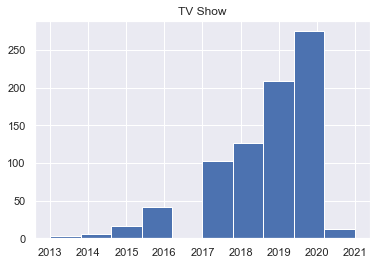

In [700]:
df_new.query('seasons=="Seasons"')['year'].hist()
plt.title('TV Show')

Text(0.5, 1.0, 'Movie')

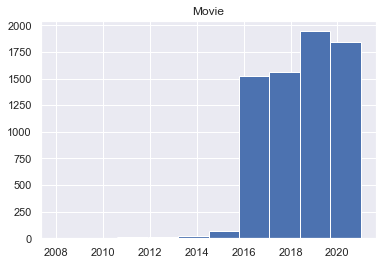

In [701]:
df_new['release_year'].mean()
df_new.query('seasons!="Seasons"')['year'].hist()
plt.title('Movie')

## Топ 10 фильмов Netflix по жанрам<a id='6-bullet'></a> 

In [507]:
listed_in = new1[['title', 'type','listed_in','for_count', 'averageRating', 'numVotes']]
listed_in_s = new1['listed_in'].str.split(', ',expand = True)



listed_in_s.columns = ['genre1','genre2', 'genre3']

listed_in2 = listed_in.join(listed_in_s)

listed_in2.head()
listed_in_movie = listed_in2.query('type=="Movie"')

,title,type,listed_in,for_count,averageRating,numVotes,genre1,genre2,genre3
0,3%,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",1,7.8,2056.0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
2,7:19,Movie,"Dramas, International Movies",1,6.0,569.0,Dramas,International Movies,None
3,23:59,Movie,"Horror Movies, International Movies",1,4.6,848.0,Horror Movies,International Movies,None
4,9,Movie,"Action & Adventure, Independent Movies, Sci-Fi...",1,7.8,6427.0,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
6,21,Movie,Dramas,1,6.8,230193.0,Dramas,None,None


In [542]:
genre1 = listed_in_movie.groupby(['genre1' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating1'}).sort_values(by='genre1', ascending=False).reset_index() 
genre1= genre1.fillna(0)
genre2= listed_in_movie.groupby(['genre2' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating2', }).sort_values(by='genre2', ascending=False).reset_index() 
genre2 = genre2.fillna(0)

genre3= listed_in_movie.groupby(['genre3' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating3', }).sort_values(by='genre3', ascending=False).reset_index() 
genre3 =genre3.fillna(0)



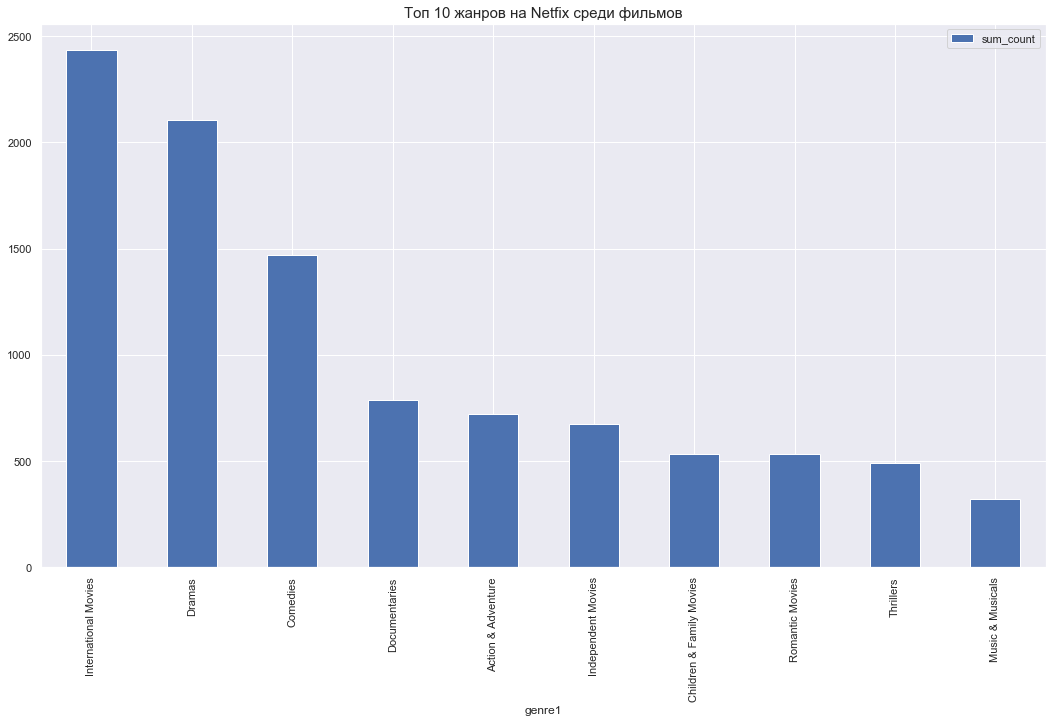

In [603]:
genre_join = genre1.merge(genre2, left_on='genre1', right_on='genre2', how='left')


genre_join2= genre_join.merge(genre3, left_on='genre1', right_on='genre3', how='left')
genre_join2['sum_count']= genre_join2['for_count_x'] +genre_join2['for_count_y']+ genre_join2['for_count']
genre_join2['sum_count'][18]=721
genre_join2['sum_count'][1]=312



genre_join2.sort_values(by='sum_count', ascending=False).head(10).plot(kind='bar',x='genre1', y='sum_count', figsize=(18,10))
plt.title('Топ 10 жанров на Netfix среди фильмов', fontsize=15);

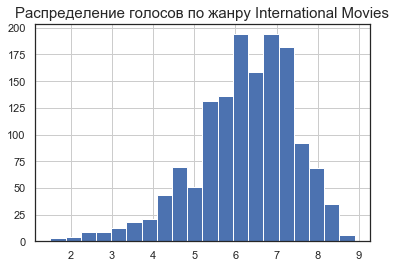

In [566]:
International_Movies = listed_in2.query('genre1 =="International Movies" or genre2== "International Movies"or genre3=="International Movies"')
International_Movies['averageRating'].hist(bins=20)
plt.title('Распределение голосов по жанру International Movies', fontsize=15);

Очистим данные от выбросов для перед проверкой статистической значимости

In [584]:
print('Верхняя граница, 99 перцентиль',np.percentile(International_Movies['averageRating'].dropna(), 99)) 
print('Нижняя граница',np.percentile(International_Movies['averageRating'].dropna(), 1))

International_Movies1 = International_Movies.query('averageRating < 8.4 and averageRating >2.5')['averageRating']
print('Медиана',International_Movies1.median())

Верхняя граница, 99 перцентиль 8.4
Нижняя граница 2.537
Медиана 6.4


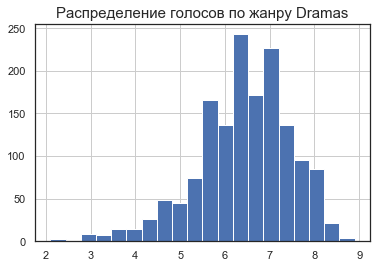

In [579]:
Dramas= listed_in2.query('genre1 =="Dramas" or genre2== "Dramas"or genre3=="Dramas"')
Dramas['averageRating'].hist(bins=20)
plt.title('Распределение голосов по жанру Dramas', fontsize=15);

In [583]:
print('Верхняя граница, 99 перцентиль', np.percentile(Dramas['averageRating'].dropna(), 99)) 
print('Нижняя граница', np.percentile(Dramas['averageRating'].dropna(), 1))

Dramas1 = Dramas.query('averageRating < 8.4 and averageRating >=3.3')['averageRating']
print('Медиана',Dramas1.median())

Верхняя граница, 99 перцентиль 8.4
Нижняя граница 3.3
Медиана 6.5


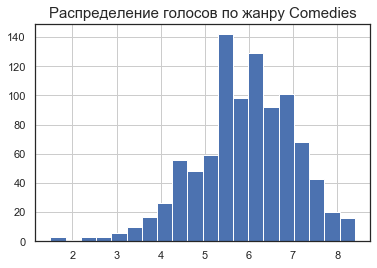

In [585]:
Comedies =listed_in2.query('genre1 =="Comedies" or genre2== "Comedies"or genre3=="Comedies"')
Comedies['averageRating'].hist(bins=20)
plt.title('Распределение голосов по жанру Comedies', fontsize=15);

In [587]:
print('Верхняя граница, 99 перцентиль', np.percentile(Comedies['averageRating'].dropna(), 99)) 
print('Нижняя граница', np.percentile(Comedies['averageRating'].dropna(), 1))

Comedies1 = Comedies.query('averageRating < 8.1 and averageRating >2.88')['averageRating']
print('Медиана',Comedies1.median())

Верхняя граница, 99 перцентиль 8.1
Нижняя граница 2.88
Медиана 5.9


Верхняя граница, 99 перцентиль 8.6
Нижняя граница 3.9179999999999997
Медиана 7.0


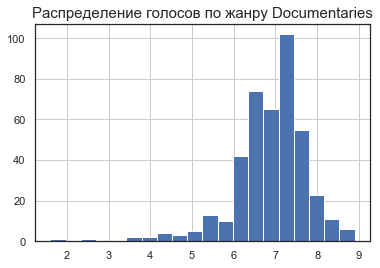

In [591]:
Documentaries= listed_in2.query('genre1 =="Documentaries" or genre2== "Documentaries"or genre3=="Documentaries"')
Documentaries['averageRating'].hist(bins=20)
plt.title('Распределение голосов по жанру Documentaries', fontsize=15);
print('Верхняя граница, 99 перцентиль', np.percentile(Documentaries['averageRating'].dropna(), 99)) 
print('Нижняя граница', np.percentile(Documentaries['averageRating'].dropna(), 1))

Documentaries1 = Documentaries.query('averageRating < 8.6 and averageRating >3.9')['averageRating']
print('Медиана',Documentaries1.median())

## Проверка статистической значимости разницы между рейтингами по жанрам<a id='7-bullet'></a> 

Проверим разницу между жанром Dramas и International Movies. Нулевая гипотеза - разницы между рейтингом этих жанров нет. Альтернативная, что есть существенная разница

In [593]:
sample_1 = Comedies1.dropna()
sample_2 = Dramas1.dropna()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, у Dramas рейтинг выше")
else:
    print("Не получилось отвергнуть нулевую гипотезу" )


p-значение: 1.0920338308422728e-06
Отвергаем нулевую гипотезу, у Dramas рейтинг выше


In [594]:
sample_11 = International_Movies1.dropna()
sample_21 = Dramas1.dropna()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results1 = st.ttest_ind(
    sample_11, 
    sample_21)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, у Dramas рейтинг выше")
else:
    print("Не получилось отвергнуть нулевую гипотезу" )


p-значение: 1.0920338308422728e-06
Отвергаем нулевую гипотезу, у Dramas рейтинг выше


In [595]:
sample_11 = Comedies1.dropna()
sample_21 = Dramas1.dropna()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results1 = st.ttest_ind(
    sample_11, 
    sample_21)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, у Dramas рейтинг выше")
else:
    print("Не получилось отвергнуть нулевую гипотезу" )

p-значение: 2.020948625760174e-35
Отвергаем нулевую гипотезу, у Dramas рейтинг выше


In [597]:
sample_111 = Comedies1.dropna()
sample_211 = Documentaries1.dropna()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results11 = st.ttest_ind(
    sample_111, 
    sample_211)

print('p-значение:', results11.pvalue)

if (results11.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, у Documentaries рейтинг выше")
else:
    print("Не получилось отвергнуть нулевую гипотезу" )

p-значение: 4.470019448351867e-63
Отвергаем нулевую гипотезу, у Documentaries рейтинг выше


### Вывод
Больше всего на Netflix представлен жанр International Movies (2437 фильмов), на втором месте Драма(2106), на третьем комедии(1471), на четвертом документальные фильмы(786 фильмов). В среднем рейтинг документальных фильмов выше остальных рейтингов (7), на втором месте драмы, на третьем International Movies, на четвертом комедии. 

## Кластеризация фильмов на основании года загрузки на Netflix, года релиза, длительности, рейтинга, количества голосов<a id='8-bullet'></a> 

In [616]:
for_stand = new1.query('type=="Movie"')[['year', 'release_year', 'mins', 'numVotes', 'averageRating']].dropna()

In [617]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(for_stand)

linked = linkage(X_sc, method = 'ward') 

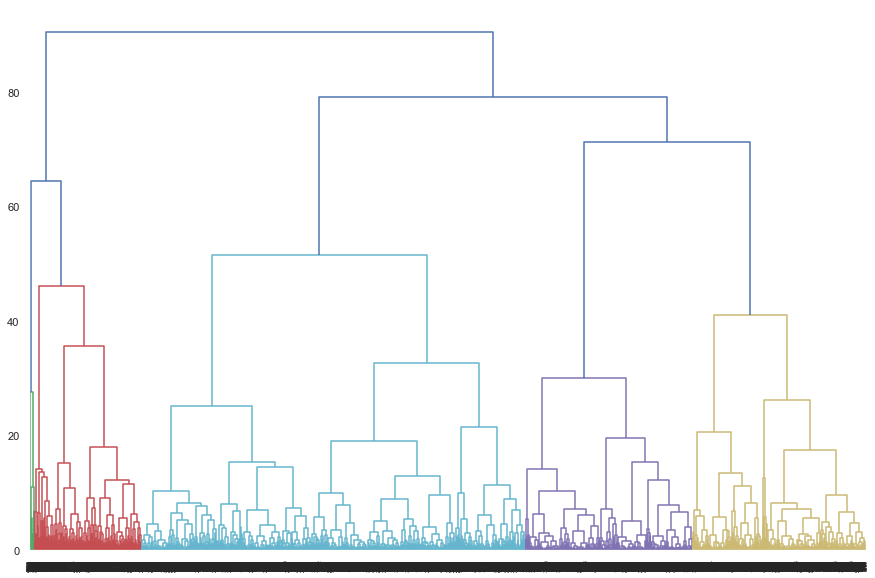

In [612]:
# Визуализируем
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [618]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5) 
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
for_stand['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
clast =for_stand.groupby('cluster_km').median()
clast.T

cluster_km,0,1,2,3,4
year,2019.0,2017.0,2019.0,2019.0,2019.0
release_year,1990.0,2016.0,2007.0,2018.0,2016.0
mins,116.0,90.0,126.0,94.0,113.0
numVotes,13745.0,1645.0,522401.0,1364.5,4698.0
averageRating,6.8,6.5,8.0,5.1,6.8


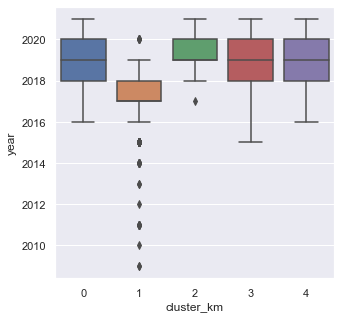

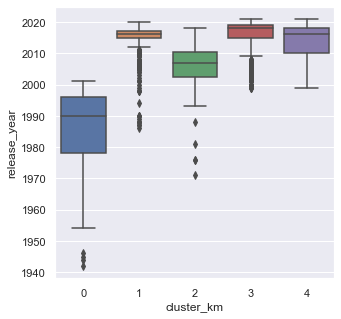

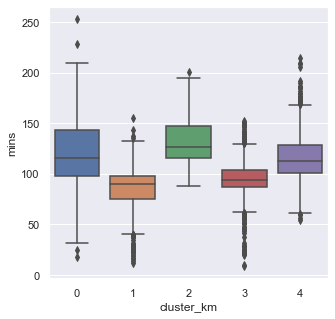

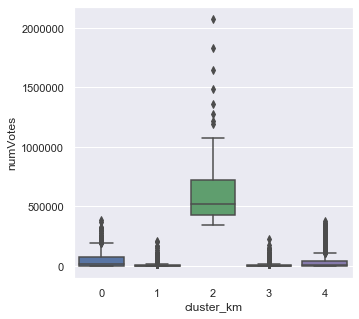

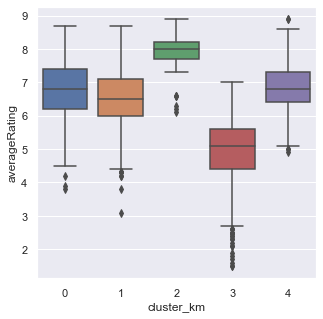

In [620]:
for column in ['year', 'release_year', 'mins', 'numVotes', 'averageRating']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster_km', y = for_stand[column], data = for_stand)
    plt.show()

### Вывод
Фильмы с самым высоким рейтингом (2 кластер) в среднем выпускались между 2001-2010годами, они же набираали больше всего голосов, средняя длительность 126 минут. Но таких фильмов всего 63. Фильмы с самым низким рейтингом были между 2015-2019г., со средней длительностью 94 минуты. Неплохой рейтинг у кластеров 0 и 4. Кластер 0 - это фильмы 80-90х годов, а 4 кластер 2010х. 

##  Сравнение фильмов и тв шоу с высоким рейтингом<a id='9-bullet'></a> 

In [697]:
print(new1['averageRating'].describe())
# В качестве высокого рейтинга возьмем данные больше 75%
averageRating_7 =new1.query('averageRating >7.3')
averageRating_other = new1.query('averageRating <=7.3')

count    4757.000000
mean        6.456401
std         1.215416
min         1.500000
25%         5.700000
50%         6.600000
75%         7.300000
max         9.600000
Name: averageRating, dtype: float64


In [703]:
release_year_for_7_sh = averageRating_7.query('type=="TV Show"').groupby('release_year').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
release_year_for_other_sh =  averageRating_other.query('type=="TV Show"').groupby('release_year').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
release_year_for_merge_sh = release_year_for_7_sh.merge(release_year_for_other_sh, on= 'release_year')
release_year_for_merge_sh['film_part'] = release_year_for_merge_sh['title_x']/(release_year_for_merge_sh['title_x'] +release_year_for_merge_sh['title_y'])
release_year_for_merge_sh.sort_values(by='film_part', ascending=False)


,release_year,title_x,title_y,film_part
7,2013,19,17,0.527778
3,2017,64,68,0.484848
6,2014,21,23,0.477273
4,2016,57,63,0.475000
2,2018,93,112,0.453659
8,2012,12,15,0.444444
0,2020,128,161,0.442907
1,2019,108,137,0.440816
5,2015,34,47,0.419753


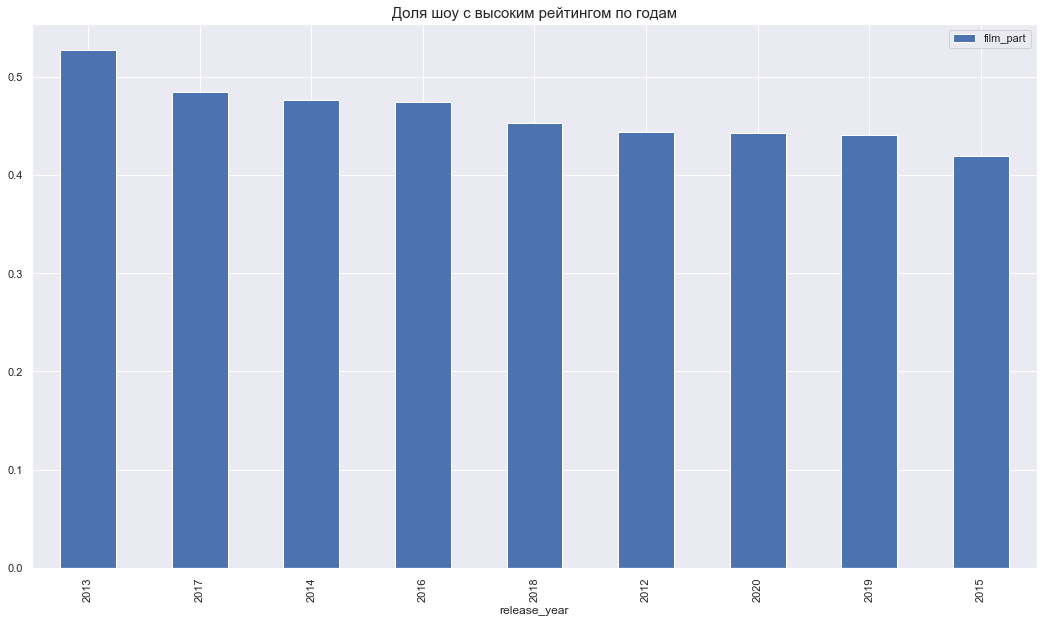

In [704]:
release_year_for_merge_sh.sort_values(by='film_part', ascending=False).plot(kind='bar', x='release_year', y='film_part', figsize=(18,10))
plt.title('Доля шоу с высоким рейтингом по годам', fontsize=15);

In [ ]:
release_year_for_7 = averageRating_7.groupby('release_year').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
release_year_for_other =  averageRating_other.groupby('release_year').agg({'title':'count'}).sort_values(by='title', ascending=False).head(10).reset_index()
release_year_for_merge = release_year_for_7.merge(release_year_for_other, on= 'release_year')
release_year_for_merge['film_part'] = release_year_for_merge['title_x']/(release_year_for_merge['title_x'] +release_year_for_merge['title_y'])
release_year_for_merge.sort_values(by='film_part', ascending=False) 

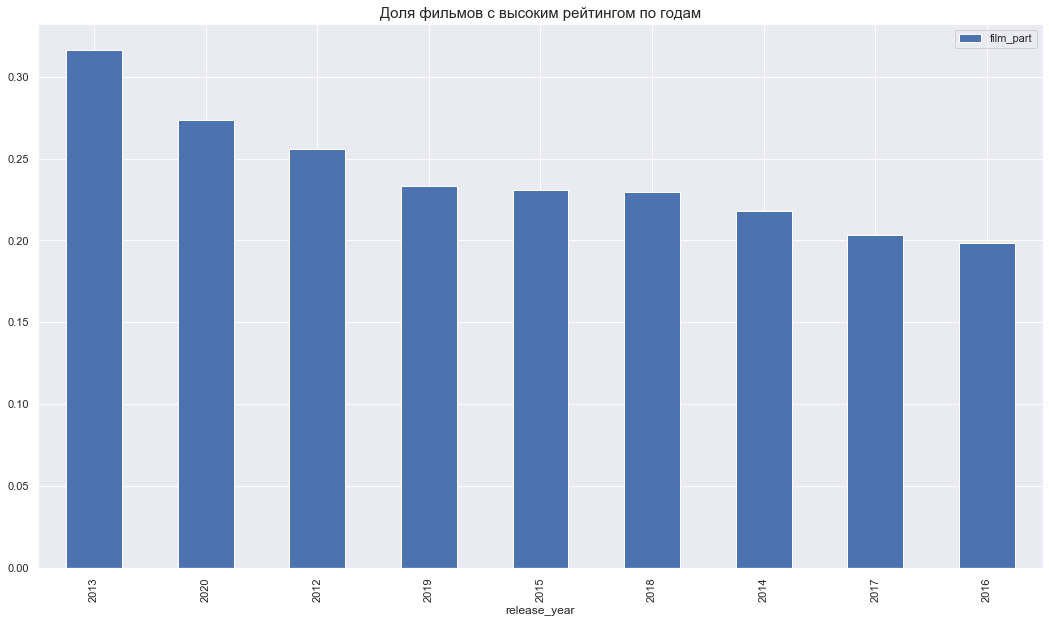

In [698]:
release_year_for_merge.sort_values(by='film_part', ascending=False).plot(kind='bar', x='release_year', y='film_part', figsize=(18,10))
plt.title('Доля фильмов с высоким рейтингом по годам', fontsize=15);

In [705]:
country7_sh = averageRating_7.query('type=="TV Show"').groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(15).reset_index()
country_other_sh  = averageRating_other.query('type=="TV Show"').groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(15).reset_index()
country_other_merge_sh  =country_other_sh.merge(country7, on='country')
country_other_merge_sh['film_part'] = country_other_merge_sh ['title_y']/(country_other_merge_sh['title_y']+country_other_merge_sh['title_x'])
country_other_merge_sh .sort_values(by='film_part', ascending=False)

,country,title_x,title_y,film_part
7,India,18,140,0.886076
2,Japan,27,56,0.674699
1,United Kingdom,57,97,0.629870
0,United States,259,418,0.617430
9,Australia,16,17,0.515152
4,Canada,24,24,0.500000
3,South Korea,25,21,0.456522
5,Spain,18,15,0.454545
8,France,16,11,0.407407
6,Mexico,18,10,0.357143


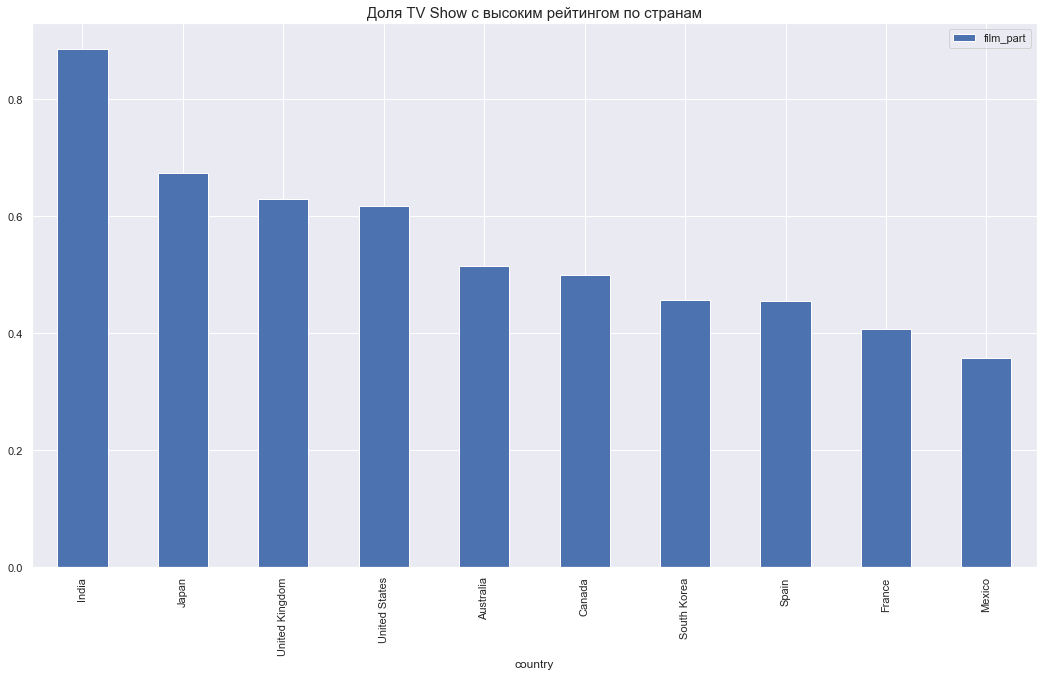

In [707]:
country_other_merge_sh.sort_values(by='film_part', ascending=False).plot(kind='bar', x='country', y='film_part', figsize=(18,10))
plt.title('Доля TV Show с высоким рейтингом по странам', fontsize=15);

In [706]:
country7 = averageRating_7.groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(15).reset_index()
country_other = averageRating_other.groupby('country').agg({'title':'count'}).sort_values(by='title', ascending=False).head(15).reset_index()
country_other_merge =country_other.merge(country7, on='country')
country_other_merge['film_part'] = country_other_merge['title_y']/(country_other_merge['title_y']+country_other_merge['title_x'])
country_other_merge.sort_values(by='film_part', ascending=False)

,country,title_x,title_y,film_part
9,Japan,38,56,0.595745
11,South Korea,31,21,0.403846
2,United Kingdom,161,97,0.375969
6,Australia,43,17,0.283333
7,"United Kingdom, United States",41,13,0.240741
0,United States,1383,418,0.232093
1,India,474,140,0.228013
10,Egypt,32,9,0.219512
8,Mexico,40,10,0.200000
3,Canada,97,24,0.198347


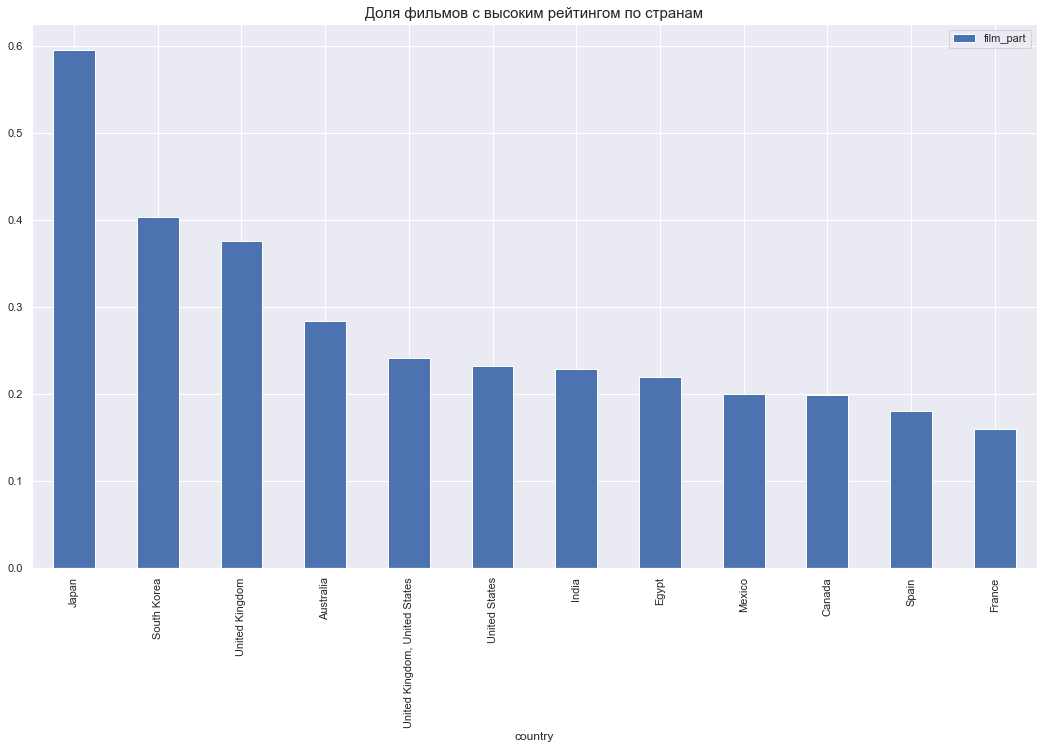

In [661]:
country_other_merge.sort_values(by='film_part', ascending=False).plot(kind='bar', x='country', y='film_part', figsize=(18,10))
plt.title('Доля фильмов с высоким рейтингом по странам', fontsize=15);

In [699]:

listed_in2_7 = listed_in2.query('averageRating >7.3')['title']
listed_in2_other = listed_in2.query('averageRating <=7.3')['title']

genre1_7 = listed_in_movie.query('title in @listed_in2_7').groupby(['genre1' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating1'}).sort_values(by='genre1', ascending=False).reset_index() 
genre1_7= genre1_7.fillna(0)
genre2_7= listed_in_movie.query('title in @listed_in2_7').groupby(['genre2' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating2', }).sort_values(by='genre2', ascending=False).reset_index() 
genre2_7 = genre2_7.fillna(0)

genre3_7= listed_in_movie.query('title in @listed_in2_7').groupby(['genre3' ]).agg({'for_count':'count', 'averageRating':'median', }).rename(columns = {'averageRating':'averageRating3', }).sort_values(by='genre3', ascending=False).reset_index() 
genre3_7 =genre3_7.fillna(0)
genre_join_7 = genre1_7.merge(genre2_7, left_on='genre1', right_on='genre2', how='left')

genre_join2_7= genre_join_7.merge(genre3_7, left_on='genre1', right_on='genre3', how='left')
genre_join2_7=genre_join2_7.fillna(0)

genre_join2_7['count_sum'] = genre_join2_7['for_count_x'] +genre_join2_7['for_count_y'] +genre_join2_7['for_count'] 
genre_join2_7=genre_join2_7[['genre1', 'count_sum']]
genre_join2_for_join=genre_join2[['genre1', 'sum_count']] 
genre_join2_for_merge = genre_join2_for_join.merge(genre_join2_7, on='genre1')
#genre_join2_for_merge=genre_join2_for_merge.finllna(0)
genre_join2_for_merge['film_part']= genre_join2_for_merge['count_sum']/genre_join2_for_merge['sum_count']
genre_join2_for_merge.sort_values(by='film_part', ascending=False).head(10)

,genre1,sum_count,count_sum,film_part
9,Classic Movies,103.0,41.0,0.398058
7,Cult Movies,59.0,18.0,0.305085
6,Documentaries,786.0,123.0,0.156489
0,Stand-Up Comedy,312.0,44.0,0.141026
5,Dramas,2106.0,286.0,0.135802
3,International Movies,2437.0,242.0,0.099302
1,Music & Musicals,321.0,29.0,0.090343
12,Action & Adventure,721.0,61.0,0.084605
8,Comedies,1471.0,79.0,0.053705
10,Children & Family Movies,532.0,19.0,0.035714


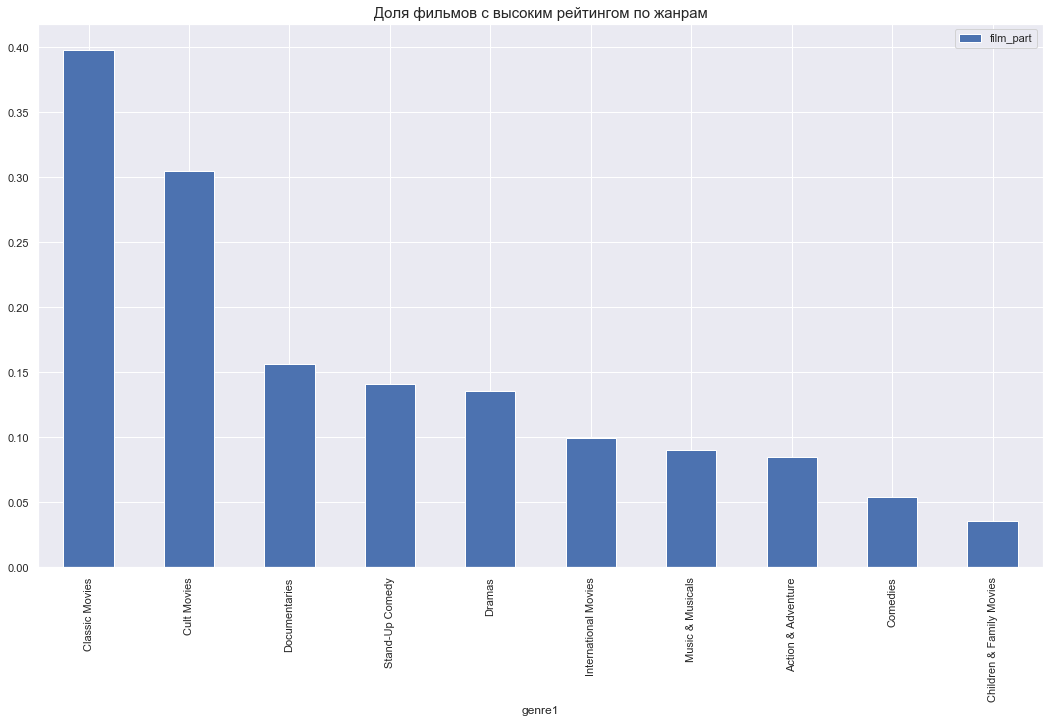

In [696]:
genre_join2_for_merge.sort_values(by='film_part', ascending=False).head(10).plot(kind='bar', x='genre1', y='film_part', figsize=(18,10))
plt.title('Доля фильмов с высоким рейтингом по жанрам', fontsize=15);

In [722]:
listed_in_show = listed_in2.query('type== "TV Show"')
genre1_7_sh = listed_in_show.query('title in @listed_in2_7').groupby(['genre1' ]).agg({'for_count':'count', }).sort_values(by='genre1', ascending=False).reset_index() 
genre1_7_sh= genre1_7_sh.fillna(0)
genre2_7_sh= listed_in_show.query('title in @listed_in2_7').groupby(['genre2' ]).agg({'for_count':'count',}).sort_values(by='genre2', ascending=False).reset_index() 
genre2_7_sh = genre2_7_sh.fillna(0)

genre3_7_sh= listed_in_show.query('title in @listed_in2_7').groupby(['genre3' ]).agg({'for_count':'count', }).sort_values(by='genre3', ascending=False).reset_index() 
genre3_7_sh =genre3_7_sh.fillna(0)
genre_join_7_sh = genre1_7_sh.merge(genre2_7_sh, left_on='genre1', right_on='genre2', how='left')

genre_join2_7_sh= genre_join_7_sh.merge(genre3_7_sh, left_on='genre1', right_on='genre3', how='left')
genre_join2_7_sh=genre_join2_7_sh.fillna(0)

genre_join2_7_sh['count_sum'] = genre_join2_7_sh['for_count_x'] +genre_join2_7_sh['for_count_y'] +genre_join2_7_sh['for_count'] 
genre_join2_7_sh=genre_join2_7_sh[['genre1', 'count_sum']]

genre1_7_sh_all = listed_in_show.groupby(['genre1' ]).agg({'for_count':'count', }).sort_values(by='genre1', ascending=False).reset_index() 
genre1_7_sh_all= genre1_7_sh_all.fillna(0)
genre2_7_sh_all= listed_in_show.groupby(['genre2' ]).agg({'for_count':'count',}).sort_values(by='genre2', ascending=False).reset_index() 
genre2_7_sh_all = genre2_7_sh_all.fillna(0)

genre3_7_sh_all= listed_in_show.groupby(['genre3' ]).agg({'for_count':'count', }).sort_values(by='genre3', ascending=False).reset_index() 
genre3_7_sh_all =genre3_7_sh_all.fillna(0)
genre_join_7_sh_all = genre1_7_sh_all.merge(genre2_7_sh_all, left_on='genre1', right_on='genre2', how='left')

genre_join2_7_sh_all= genre_join_7_sh_all.merge(genre3_7_sh_all, left_on='genre1', right_on='genre3', how='left')
genre_join2_7_sh_all=genre_join2_7_sh_all.fillna(0)


genre_join2_7_sh
genre_join2_7_sh_all['count_sum'] = genre_join2_7_sh_all['for_count_x']+genre_join2_7_sh_all['for_count_y']+genre_join2_7_sh_all['for_count']
genre_join2_7_sh_all=genre_join2_7_sh_all[['genre1', 'count_sum']]
genre_join2_7_sh_all_merge= genre_join2_7_sh_all.merge(genre_join2_7_sh, on ='genre1')
genre_join2_7_sh_all_merge['film_part'] = genre_join2_7_sh_all_merge['count_sum_y']/genre_join2_7_sh_all_merge['count_sum_x']
genre_join2_7_sh_all_merge.sort_values(by='film_part', ascending=False)

,genre1,count_sum_x,count_sum_y,film_part
12,Classic & Cult TV,27.0,18.0,0.666667
0,TV Sci-Fi & Fantasy,76.0,26.0,0.342105
10,Docuseries,353.0,118.0,0.334278
4,TV Action & Adventure,150.0,50.0,0.333333
13,British TV Shows,232.0,77.0,0.331897
11,Crime TV Shows,427.0,126.0,0.295082
2,TV Dramas,704.0,207.0,0.294034
14,Anime Series,148.0,41.0,0.277027
3,TV Comedies,525.0,135.0,0.257143
1,TV Horror,69.0,17.0,0.246377


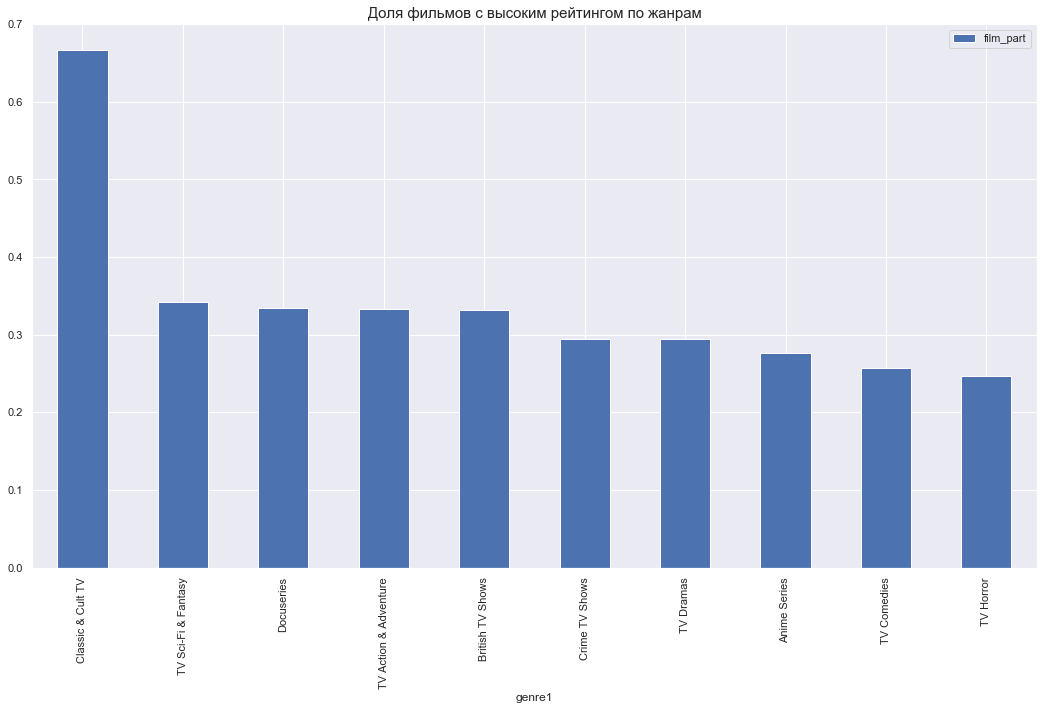

In [723]:
genre_join2_7_sh_all_merge.sort_values(by='film_part', ascending=False).head(10).plot(kind='bar', x='genre1', y='film_part', figsize=(18,10))
plt.title('Доля фильмов с высоким рейтингом по жанрам', fontsize=15);

### Вывод
* На Netflix фильмы с самым высоким рейтингом выпускались в 2013г.(31% фильмов этого года имеют рейтинг больше 7.3), на втором месте 2020(27% фильмов с высоким рейтингом). 
* ТВ шоу гораздо больше с высоким рейтингом, чем фильмов. в том же 2013г.Тв шоу с высоким рейтингом было 53%, в 2017 - 47% 
* Японские фильмы в 60% случаев имеют высокий рейтинг, на втором месте Корейские фильмы (40%), на третьем Австралия(37%). Это не значит, что иностранные фильмы более качественные, возможно, из иностранных фильмов для Netflix выбираются только лучшие.
* Индийских сериалов несмотря на то, что не так много, но 89% из них имеют высокий рейтинг. Японские сериалы в 67% случаях имеют более высокий рейтинг. Английские - 63%.
* Самый рейтинговый жанр - классическое кино(41% фильмов с высоким рейтингом), на втором месте культовое кино (31%), на третьем - документальное кино(15%). Рейтинговый жанр не означает массовый, эти три жанра не самые массовые 
* Среди ТВ шоу самый рейтинговый жанр это Classic & Cult TV (67% шоу с высоким рейтингом), на втором месте TV Sci-Fi & Fantas(34%), на третьем месте Docuseries (33%).
В целом видно, что ТВ шоу с высоким рейтингом больше, чем фильмов с высоким рейтингом. Похоже, что либо Netflix больше следит за качеством сериалов, чем фильмов, либо в сериалы сами по себе производятся более качественные, чем кино. 


## Вывод<a id='10-bullet'></a> 
* Больше всего на Netflix представлен жанр International Movies (2437 фильмов), на втором месте Драма(2106), на третьем комедии(1471), на четвертом документальные фильмы(786 фильмов). 
* В среднем рейтинг документальных фильмов выше остальных рейтингов (7), на втором месте драмы, на третьем International Movies, на четвертом комедии.
* Есть тенденция в увеличении количества ТВ шоу, так же как и увеличение рейтинга ТВ шоу.
* По количеству самых рейтинговых фильмов (среди стран, где больше 100 фильмов) лидируют Индия, UK, USA и Канада. Больше всего рейтинговых сериалов производства Японии, UK, Кореи и США.
* Самые популярный жанр на Netflix International Movies	(2437 фильма), на втором месте Dramas (2106 фильма), на третьем Comedies(1471), на четвертом Documentaries(786)
* По количеству шоу лидирует США(700 шоу), с большим отрывом идут Англия, Япония и Корея.
* По количеству фильмов лидирует США(около 2000 фильмов), с большим отрывом следует Индия, Англия и Канада. 
* В процентном соотношении больше всего сериалов производства Южной Кореи  (80% от всей продукции Кореи), на втором месте Япония, на третьем Австралия.
* В среднем все страны из топ 5 снимают по 1 сезону.
* Длительность фильмов у США стремится к увеличению. Самые длинные фильмы у Индии, на втором месте Испания.
* Пик популярности американских фильмов был в 2019г., индийские фильмы в большом количестве загрузили в 2018г.
* Американские шоу набрали популярность в 2020г. Английские фильмы и шоу больше всего загружали в 2017 и 2019. Это совпадает с загрузкой корейских сериалов. Японские шоу догнали по количеству корейские и английские в 2020 г. Похоже, что 2020г. можно назвать годом наибольшей популярности шоу.